# Reseources

1. Book Chapter 8
2. [hyperspy](https://hyperspy.readthedocs.io/en/stable/user_guide/mva.html)
3. [11 Dimensionality reduction techniques you should know in 2021](https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b)
4. [Robust PCA](https://github.com/dganguli/robust-pca)

# Dimensionality reduction methods


<b> The aim of each method is to reduce the feature space by extracting components (linear combinations) that present the high variations of the data-- low variation could present noise. </b>

1. Linear methods:
    - PCA.
    - Sparse PCA.
    - Randomized PCA.
    - Incremental (Mini-batch) PCA.
    - Robust PCA.
    - Others.  
2. Non-linear methods (Manifold):
   - Kernel PCA.
   - t-distributed Stochastic Neighbor Embedding (t-SNE),
   - Isometric mapping (Isomap).




# [Robust PCA](https://kojinoshiba.com/robust-pca/)

<b> Robust Principal Component Analysis (RPCA) </b> is a modification of the widely used statistical procedure of principal component analysis (PCA) which works well with respect to grossly corrupted observations. A number of different approaches exist for Robust PCA, including an idealized version of Robust PCA, which aims to recover a low-rank matrix L0 from highly corrupted measurements M = L0 +S0.

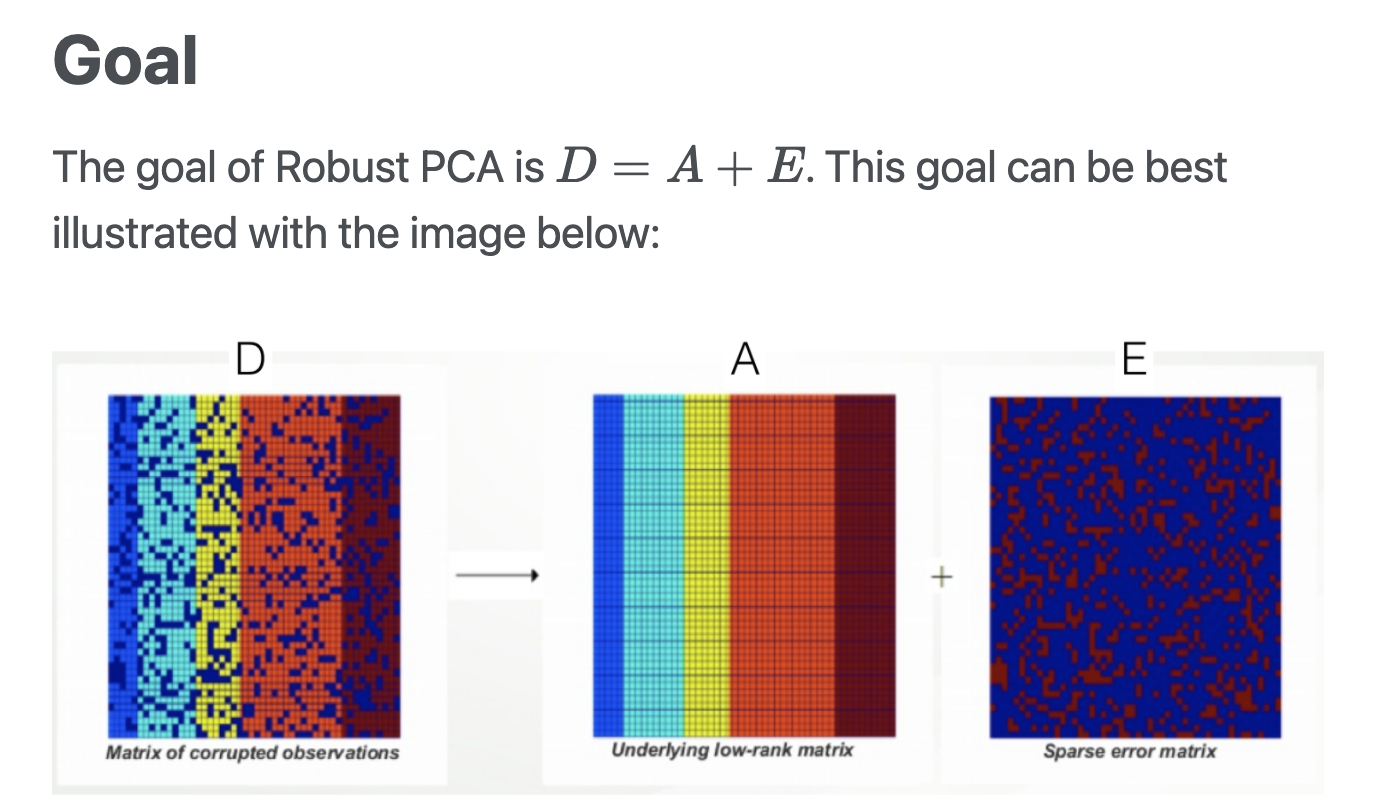

[What is the meaning of low rank matrix?](https://www.quora.com/What-is-the-meaning-of-low-rank-matrix)

## Robust PCA by Code

### Create Data

In [ ]:
import numpy as np
N = 100
num_groups = 3
num_values_per_group = 40
p_missing = 0.2

Ds = []
for k in range(num_groups):
    d = np.ones((N, num_values_per_group)) * (k + 1) * 10
    Ds.append(d)

D = np.hstack(Ds) 

In [ ]:
#Sparse 20% of data

# decimate 20% of data 
n1, n2 = D.shape
S = np.random.rand(n1, n2)
D[S < 0.2] = 0

In [ ]:
D

In [ ]:
import h5py
from sklearn.decomposition import PCA,SparsePCA

In [ ]:
from hyperspy.signals import Signal1D
s=s=Signal1D(D)

In [ ]:
s.plot()

In [ ]:
help(Signal1D.decomposition)

## RPCA

In [ ]:
s.decomposition(algorithm="RPCA", output_dimension=3, lambda1=0.1,random_state=1)

In [ ]:
sc = s.get_decomposition_model(2)
sc.plot()

## PCA

In [ ]:
s.decomposition(algorithm=PCA())

In [ ]:
sc = s.get_decomposition_model(2)
sc.plot()

# SparsePCA

In [ ]:
s.decomposition(algorithm=SparsePCA())

In [ ]:
sc = s.get_decomposition_model(2)
sc.plot()

# Non-linear methods (Manifold learning)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
sns.set_style('darkgrid')

X, y = make_moons(n_samples = 500, random_state=42)
sns.scatterplot(X[:, 0], X[:, 1], hue=y, palette='Set1')
plt.savefig('Non-linear data.png')

## PCA vs. KernelPCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_kpca[:, 0], X_kpca[:, 1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA", fontsize=15, pad=15)
ax[1].set_title("RBF Kernel PCA", fontsize=15, pad=15)
ax[0].set_xlabel("Component 1", fontsize=12)
ax[0].set_ylabel("Component 2", fontsize=12)
ax[1].set_xlabel("Component 1", fontsize=12)
ax[1].set_ylabel("Component 2", fontsize=12)
plt.savefig('PCA vs Kernel PCA.png', dpi=100)

## t-distributed Stochastic Neighbor Embedding (t-SNE)


Stochastic → not definite but random probability    
Neighbor →concerned only about retaining the variance of neighbor points     
Embedding → plotting data into lower dimensions   

### HYPERPARAMETER TUNING
2 parameters that can highly influence the results are
1.  n_iter: The number of iterations that the algorithm runs
2.  perplexity: This can be thought of as the number of neighboring points t-SNE must consider.


### [Steps](https://medium.com/swlh/t-sne-explained-math-and-intuition-94599ab164cf)

<b> Step 1:</b> t-SNE constructs a probability distribution on pairs in higher dimensions such that similar objects are assigned a higher probability and dissimilar objects are assigned lower probability.   
<b> Step 2: </b> Then, t-SNE replicates the same probability distribution on lower dimensions. To do that, we build a random dataset of points with the same number of points as we had in the original dataset, and K features, where K is our target dimension.  
<b> Step 3: </b> Do Step 1 and 2 iteratively till the difference (using KL-diverge) between the two distribution is minimized or you reach to n_iter.  

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
sns.set_style('darkgrid')

iris = load_iris()
X = iris.data
y = iris.target

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-SNE of IRIS dataset", fontsize=15, pad=15)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1')
plt.title("PCA of IRIS dataset", fontsize=15, pad=15)

## Isometric mapping (Isomap)

It connects each instance by calculating the curved or geodesic distance to its nearest neighbors and reduces dimensionality. The number of neighbors to consider for each point can be specified through the n_neighbors hyperparameter 

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import Isomap
sns.set_style('darkgrid')

iris = load_iris()
X = iris.data
y = iris.target

isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=y, palette='Set1')
plt.title("Isomap of IRIS dataset", fontsize=15, pad=15)
plt.savefig('Isomap.png')